In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [27]:
from sklearn.metrics import *
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('gene_expression.csv')
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [3]:
X = df.drop(labels='Cancer Present', axis=1)
y = df['Cancer Present']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'X_train size: {len(X_train)}', end=', ')
print(f'X_test size: {len(X_test)}')
print(f'y_train size: {len(y_train)}', end=', ')
print(f'y_test size: {len(y_test)}')

X_train size: 2400, X_test size: 600
y_train size: 2400, y_test size: 600


In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print('Feature scaling is successful.')

Feature scaling is successful.


In [118]:
def best_k_value():
    errors = []
    for k in range(1, 31):
        model = KNeighborsClassifier(n_neighbors=k).fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        error = 1 - accuracy_score(y_true=y_test, y_pred=y_pred)
        errors.append(error.round(3))

    best_k = errors.index(min(errors))
    print(f'Best k value: {best_k + 1}, Error: {(min(errors))}')  

    plt.figure(figsize=(15, 8))
    plt.plot(
        errors,
        c='cyan'); 
    plt.plot(
        errors, 
        markevery=best_k, 
        marker="x", 
        mec='red',
        ms=15,
        mew=5
    ); 
    plt.xlabel('K values');
    plt.ylabel('Error Rates')
    plt.xlim(1, 30);

Best k value: 22, Error: 0.055


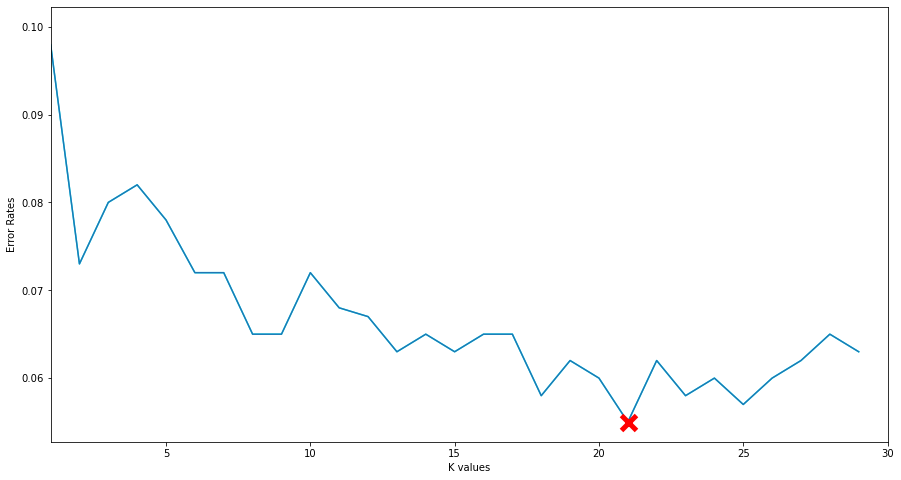

In [119]:
best_k_value()